# Outliers

- Eliminarlo si son aislados y no explican el modelo
- Tratarlos si son explicativos del modelo

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv('../datasets/auto/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


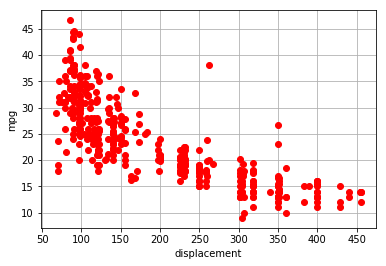

In [39]:
plt.plot(df['displacement'],df['mpg'],'ro')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.grid(True);

### With Outliers

In [32]:
from sklearn.linear_model import LinearRegression

X = df['displacement'].fillna(df['displacement'].mean())
y = df['mpg'].fillna(df['mpg'].mean())
X = X[:,np.newaxis]

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
lm.score(X,y)

0.6261049762826918

In [34]:
y_pred = lm.predict(X)

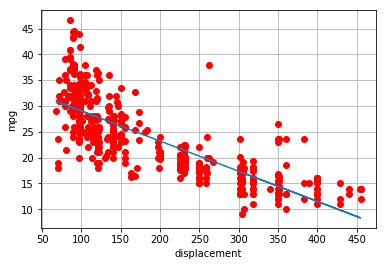

In [35]:
plt.plot(X,y,'ro',label='Real')
plt.plot(X,y_pred,label='Prediction')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.grid(True);

### Without Outliers

In [41]:
df['displacement'] = df['displacement'].fillna(df['displacement'].mean())
df['mpg'] = df['mpg'].fillna(df['mpg'].mean())

In [42]:
df[(df['displacement']>250)&(df['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [45]:
df[(df['displacement']>300)&(df['mpg']>22)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
11,23.514573,8,350.0,165.0,4142,11.5,70,1,chevrolet chevelle concours (sw)
12,23.514573,8,351.0,153.0,4034,11.0,70,1,ford torino (sw)
13,23.514573,8,383.0,175.0,4166,10.5,70,1,plymouth satellite (sw)
14,23.514573,8,360.0,175.0,3850,11.0,70,1,amc rebel sst (sw)
17,23.514573,8,302.0,140.0,3353,8.0,70,1,ford mustang boss 302
305,23.000000,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.600000,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [52]:
df_clean = df.drop(index=[11,12,13,14,17,305,372,395])

In [53]:
from sklearn.linear_model import LinearRegression

X = df_clean['displacement']
y = df_clean['mpg']
X = X[:,np.newaxis]

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
lm.score(X,y)

0.6654491977018057

In [55]:
y_pred = lm.predict(X)

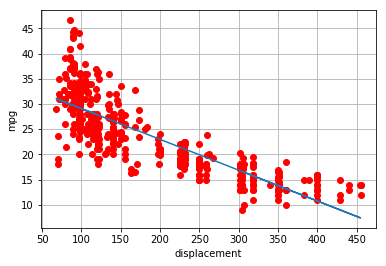

In [56]:
plt.plot(X,y,'ro',label='Real')
plt.plot(X,y_pred,label='Prediction')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.grid(True);